In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller

Notebook having
1.Time series decomposition
    a) Seasonality
    b) Trend
    c) Noise
    d) Level
2.Stationarity
    a) ACF and PACF plots
    b) Rolling mean and std
    c) Dickey-Fuller Test
3.Making time series stationary
    a) Difference transform
    b) Log Scale
    c) Smoothing
    d) Moving 

In [5]:
df = pd.read_csv('pollution.csv', sep = ',',decimal=',')

In [6]:
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11,1021,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12,1020,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11,1019,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14,1019,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12,1018,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2,1034,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3,1034,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3,1034,NW,242.7,0,0
43822,43823,2014,12,31,22,8.0,-22,-4,1034,NW,246.72,0,0


In [7]:
def parse(x):
    return datetime.strptime(x,'%Y %m %d %H')

In [8]:
df = pd.read_csv('pollution.csv', sep = ',', parse_dates =[['year','month','day','hour']], index_col = 0, 
                 date_parser = parse )

In [9]:
df.drop('No', inplace = True, axis = 1)

In [10]:
df

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
year_month_day_hour,,,,,,,,
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


In [11]:
df.columns=['pollution','dew','temperature','pressure','wind direction', 'wind speed','snow', 'rain']

In [12]:
df['pollution'].fillna(0, inplace = True)

In [13]:
df

,pollution,dew,temperature,pressure,wind direction,wind speed,snow,rain
year_month_day_hour,,,,,,,,
2010-01-01 00:00:00,0.0,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,0.0,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,0.0,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,0.0,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,0.0,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


In [14]:
df.index.name = "datetimeindex"
df = df[24:]    
df["pollution"].fillna(0, inplace=True)
df.pollution = df.pollution.replace(
        0, np.nan).interpolate()
df = df.resample("D").mean()
df = df[df.pollution != 0]

/Users/newuser/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
/Users/newuser/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [15]:
df

,pollution,dew,temperature,pressure,wind speed,snow,rain
datetimeindex,,,,,,,
2010-01-02,145.958333,-8.500000,-5.125000,1024.750000,24.860000,0.708333,0.0
2010-01-03,78.833333,-10.125000,-8.541667,1022.791667,70.937917,14.166667,0.0
2010-01-04,31.333333,-20.875000,-11.500000,1029.291667,111.160833,0.000000,0.0
2010-01-05,42.458333,-24.583333,-14.458333,1033.625000,56.920000,0.000000,0.0
2010-01-06,56.416667,-23.708333,-12.541667,1033.750000,18.511667,0.000000,0.0
...,...,...,...,...,...,...,...
2014-12-27,238.666667,-9.666667,-1.791667,1027.833333,9.278333,0.000000,0.0
2014-12-28,197.375000,-10.791667,1.583333,1019.958333,10.948750,0.000000,0.0
2014-12-29,159.000000,-12.333333,0.750000,1013.750000,8.000000,0.000000,0.0


In [16]:
df.to_csv('air_pollution.csv')

In [17]:
dataset = pd.read_csv('air_pollution.csv', index_col = 0, parse_dates = ['datetimeindex'])

In [18]:
dataset

,pollution,dew,temperature,pressure,wind speed,snow,rain
datetimeindex,,,,,,,
2010-01-02,145.958333,-8.500000,-5.125000,1024.750000,24.860000,0.708333,0.0
2010-01-03,78.833333,-10.125000,-8.541667,1022.791667,70.937917,14.166667,0.0
2010-01-04,31.333333,-20.875000,-11.500000,1029.291667,111.160833,0.000000,0.0
2010-01-05,42.458333,-24.583333,-14.458333,1033.625000,56.920000,0.000000,0.0
2010-01-06,56.416667,-23.708333,-12.541667,1033.750000,18.511667,0.000000,0.0
...,...,...,...,...,...,...,...
2014-12-27,238.666667,-9.666667,-1.791667,1027.833333,9.278333,0.000000,0.0
2014-12-28,197.375000,-10.791667,1.583333,1019.958333,10.948750,0.000000,0.0
2014-12-29,159.000000,-12.333333,0.750000,1013.750000,8.000000,0.000000,0.0


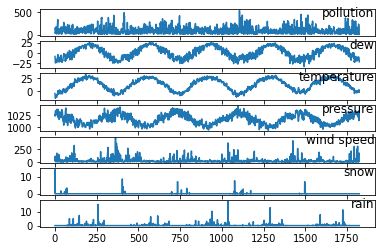

In [19]:
values = dataset.values
groups = [0, 1, 2, 3, 4, 5, 6]
i = 1
# plot each column
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(df.columns[group], y=0.5, loc='right')
    i += 1


plt.show()

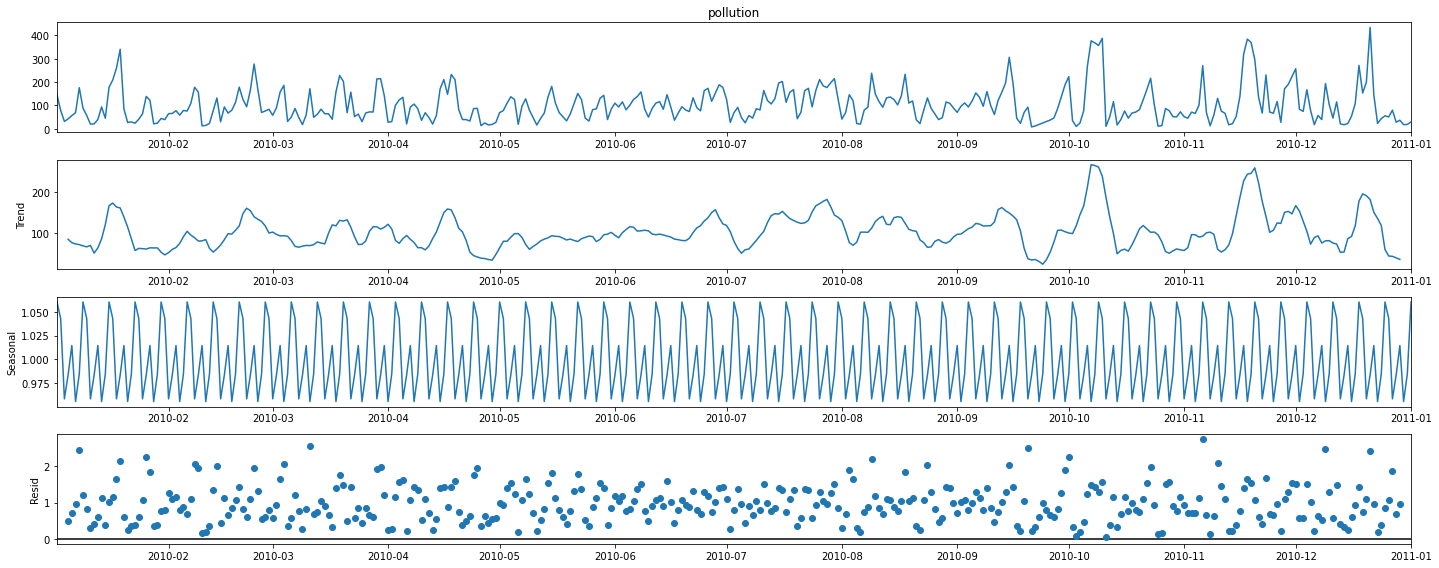

<Figure size 4000x1600 with 0 Axes>

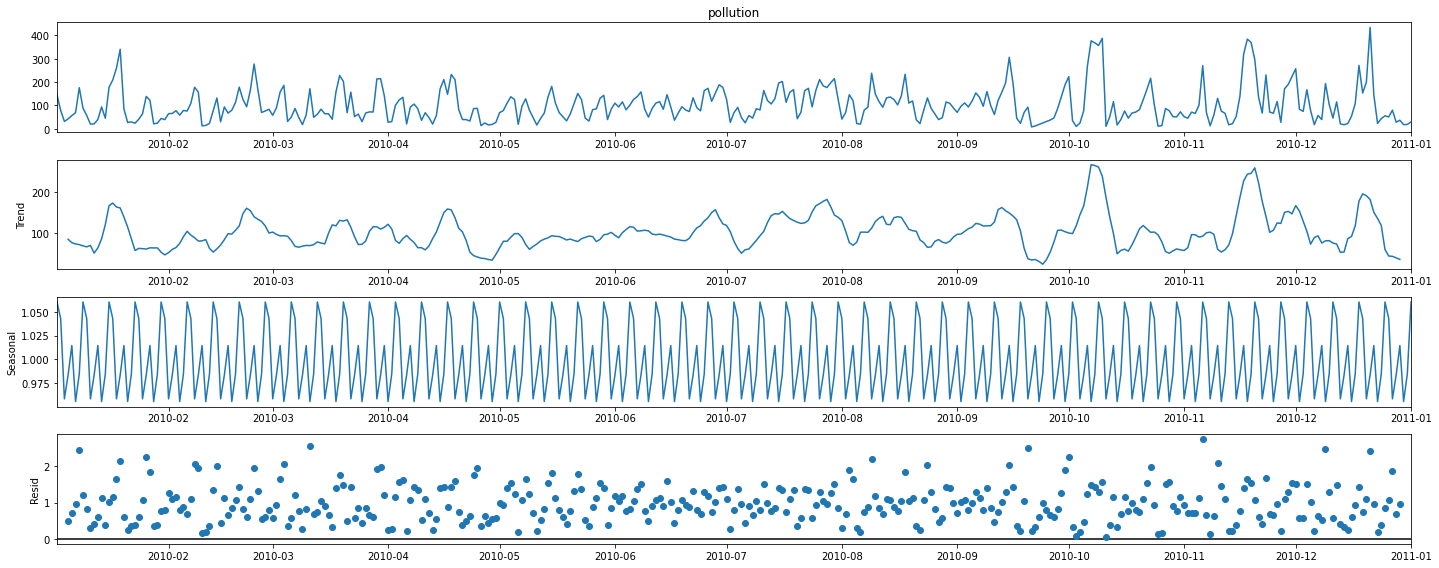

In [20]:
rcParams['figure.figsize'] = 20,8
plt.figure(figsize=(50,20), dpi = 80)
series = dataset['pollution'][:365]
result = seasonal_decompose(series, model = "multiplicative")
result.plot()

Checking trends for our models
Moving Average
Automatic decomposing
Linear Regression models

Text(0.5, 1.0, 'Linear Regression fitted trend')

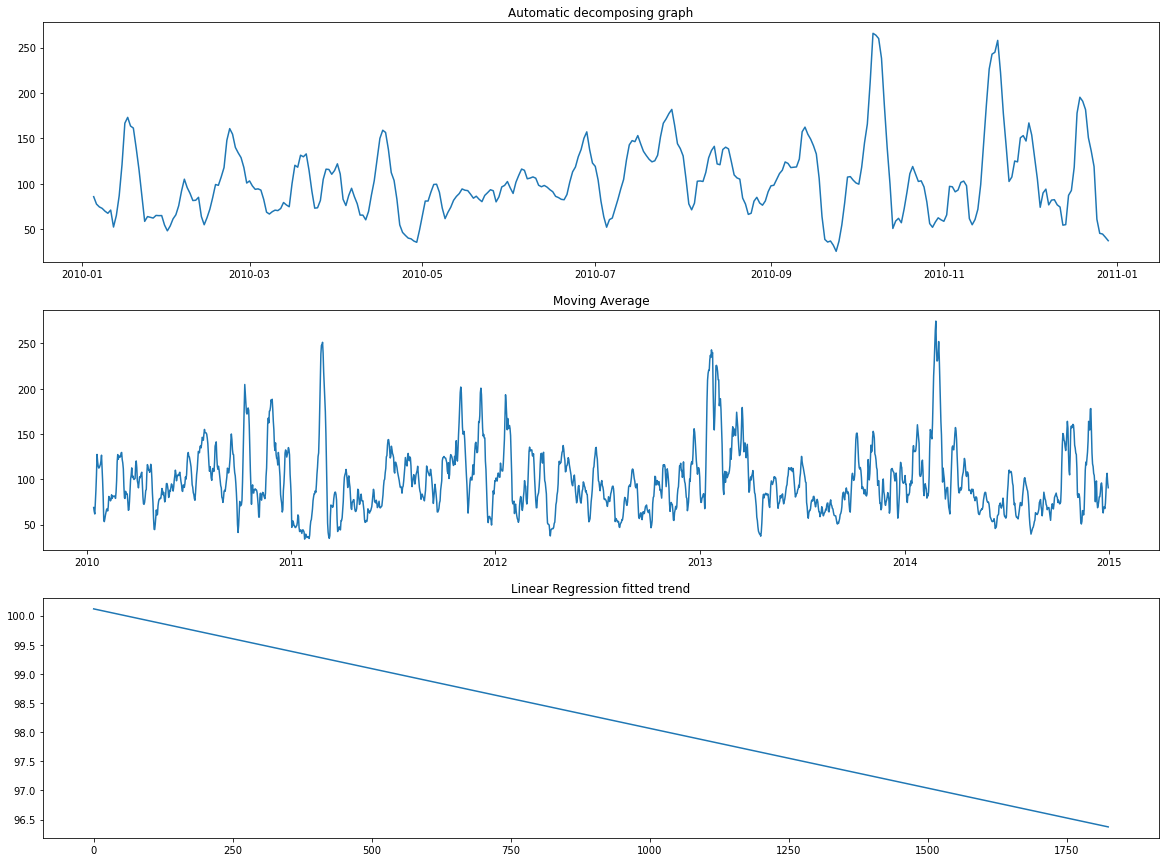

In [21]:
fig = plt.figure(figsize = (20,15))
layout = (3,2)
ad_ax = plt.subplot2grid(layout, (0,0), colspan = 2)
ma_ax = plt.subplot2grid(layout, (1,0), colspan = 2)
lm_ax = plt.subplot2grid(layout, (2,0), colspan = 2)

ad_ax.plot(result.trend)
ad_ax.set_title('Automatic decomposing graph')

mv_mean = dataset['pollution'].rolling(12).mean()
ma_ax.plot(mv_mean)
ma_ax.set_title('Moving Average')

X = [i for i in range(0, len(df['pollution']))]
X = np.reshape(X, (len(X), 1))
y = df['pollution'].values

model = LinearRegression()
model.fit(X,y)
trend = model.predict(X)
lm_ax.plot(trend)
lm_ax.set_title("Linear Regression fitted trend")

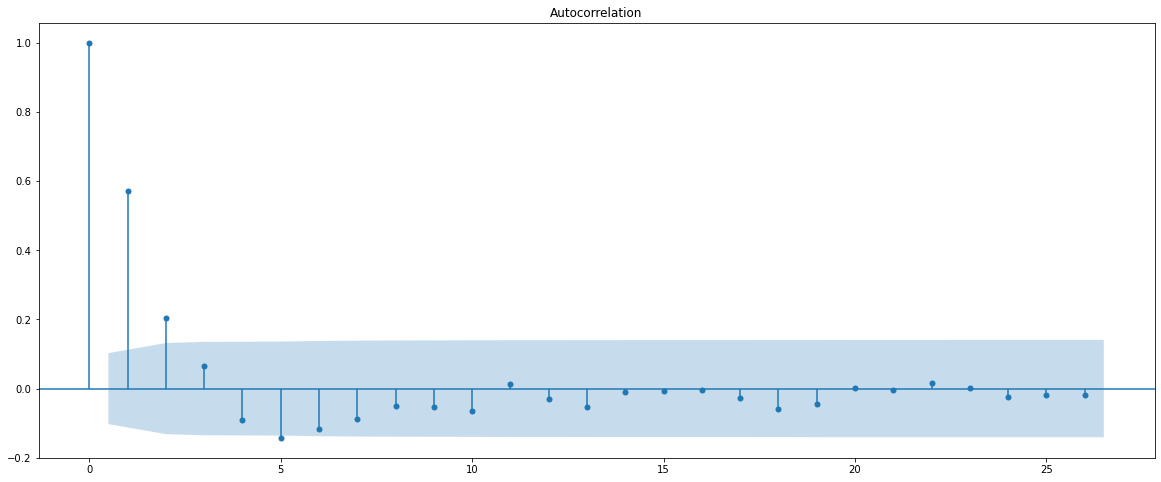

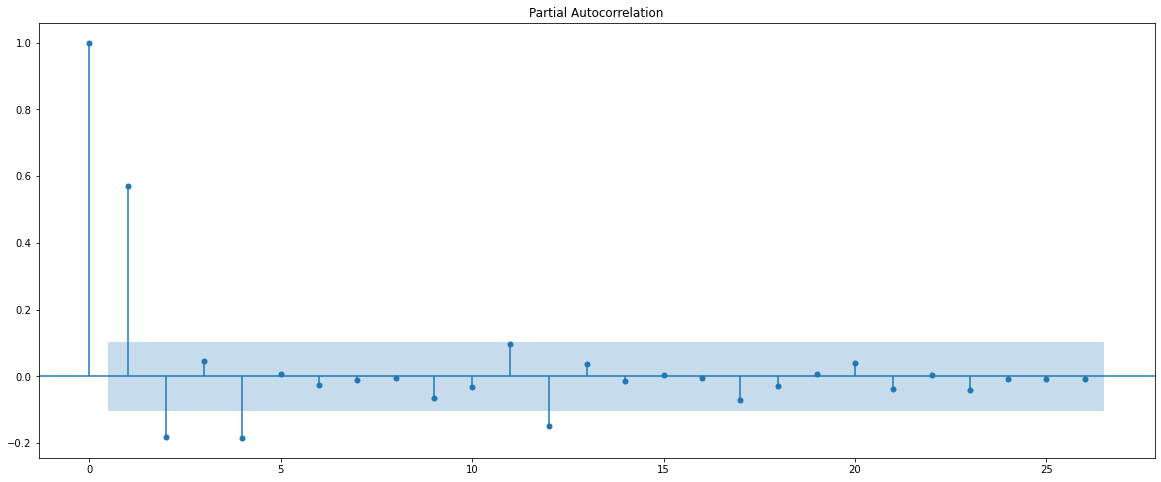

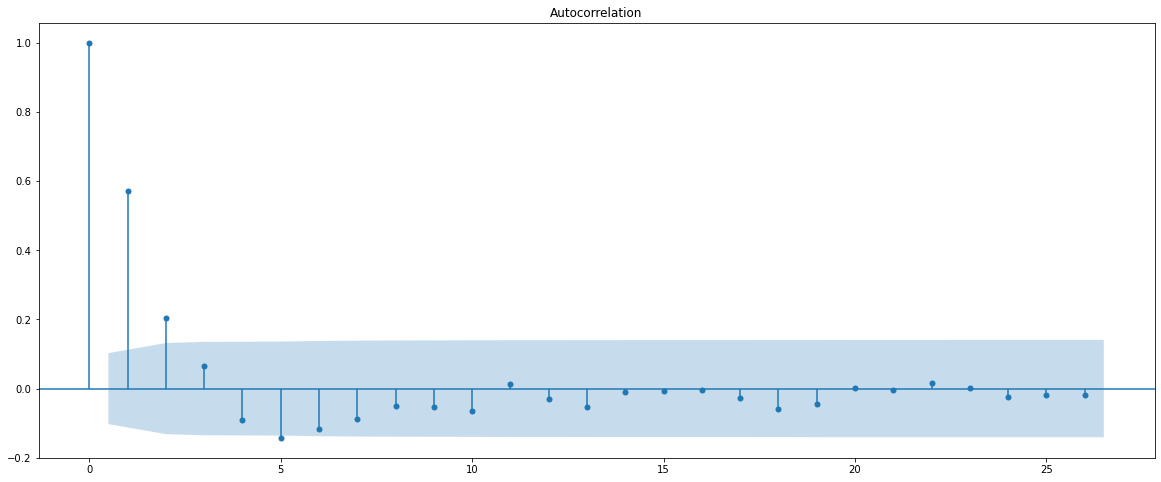

In [22]:
plot_pacf(series)
plot_acf(series)

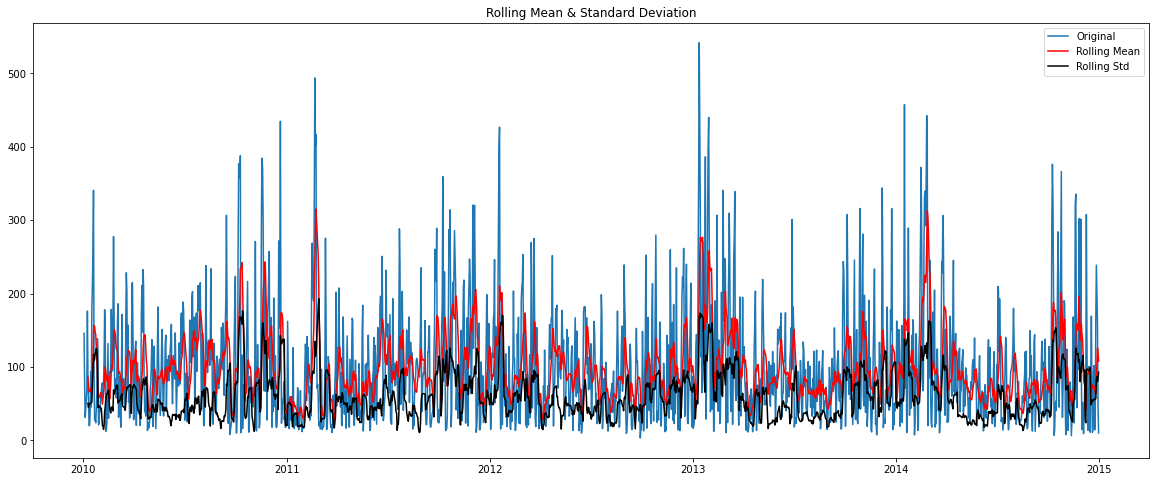

In [25]:
##Determining if our time series is correlated or not
rolling_mean = dataset['pollution'].rolling(window = 8).mean()
rolling_std = dataset['pollution'].rolling(window = 8).std()

# Plot rolling statistics:
orig = plt.plot(dataset['pollution'], label='Original')
mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
std = plt.plot(rolling_std, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

mean and standard deviation is constant over a period of time. pattern repeats over a period of time.

In [32]:
##Augmented Dickey-Fuller test 
adf = adfuller(dataset['pollution'])
print("ADF statistics: %f" % adf[0])
print("P-value: %f" % adf[1])
print("Critical values: ")
for key, value in adf[4].items():
    print('\t%s: %.3f '% (key, value))

ADF statistics: -10.116719
P-value: 0.000000
Critical values: 
	1%: -3.434 
	5%: -2.863 
	10%: -2.568 


If the series is not stationary we can make it stationary using differencing methods, log transform